In [189]:
import os
import sys
import urllib, io

import numpy as np
import scipy.stats as stats
import pandas as pd

import pymongo as pm
from collections import Counter
import json
import re
import ast

from PIL import Image, ImageOps, ImageDraw, ImageFont 

from io import BytesIO
import base64

import  matplotlib
from matplotlib import pylab, mlab, pyplot
%matplotlib inline
from IPython.core.pylabtools import figsize, getfigs
plt = pyplot
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42

import seaborn as sns
sns.set_context('talk')
sns.set_style('darkgrid')

from IPython.display import clear_output

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")

In [190]:
## directory & file hierarchy
proj_dir = os.path.abspath('..')
datavol_dir = os.path.join(proj_dir,'data')
analysis_dir = os.path.abspath(os.path.join(os.getcwd(),'..'))
results_dir = os.path.join(proj_dir,'results')
plot_dir = os.path.join(results_dir,'plots')
csv_dir = os.path.join(results_dir,'csv')
json_dir = os.path.join(results_dir,'json')
exp_dir = os.path.abspath(os.path.join(proj_dir,'experiments'))
png_dir = os.path.abspath(os.path.join(datavol_dir,'png'))
jefan_dir = os.path.join(analysis_dir,'jefan')
will_dir = os.path.join(analysis_dir,'will')

## add helpers to python path
if os.path.join(proj_dir,'stimuli') not in sys.path:
    sys.path.append(os.path.join(proj_dir,'stimuli'))
    
if not os.path.exists(results_dir):
    os.makedirs(results_dir)
    
if not os.path.exists(plot_dir):
    os.makedirs(plot_dir)   
    
if not os.path.exists(csv_dir):
    os.makedirs(csv_dir)       

## Load dataframe

In [382]:
iterationName = 'pilot4'
read_path = os.path.join(csv_dir,'block_silhouette_{}.csv'.format(iterationName))
df = pd.read_csv(read_path)

### Exclude Outliers

In [ ]:
#in progress
iterationName = 'pilot3'
read_path = os.path.join(csv_dir,'block_silhouette_{}.csv'.format(iterationName))
df3 = pd.read_csv(read_path)

iterationName = 'pilot4'
read_path = os.path.join(csv_dir,'block_silhouette_{}.csv'.format(iterationName))
df4 = pd.read_csv(read_path)

df = pd.merge(df3 , df4 , how='outer')

In [383]:
low_scores = df[(df.trialNum == 15) & (df.score == 0)]['gameID']
df = df[~df.gameID.isin(low_scores)]

## Summary Statistics

In [384]:
# Accuracy etc. by condition
df[['condition','normedScore','numBlocks','buildTime']].groupby(by=['condition']).describe()

normedScore                                                   \
                count      mean       std      min       25%       50%   
condition                                                                
mental          256.0  0.717268  0.225641 -0.01675  0.564562  0.766083   
physical        256.0  0.721675  0.228247  0.00000  0.590360  0.764244   

                              numBlocks            ...             buildTime  \
                75%       max     count      mean  ...   75%   max     count   
condition                                          ...                         
mental     0.909644  1.000000     256.0  7.738281  ...  10.0  17.0     256.0   
physical   0.913905  0.994675     256.0  7.691406  ...  10.0  18.0     256.0   

                                                                             \
                   mean           std       min      25%      50%       75%   
condition                                                                     
mental     49908.675781  15950.229810  -82782.0  48007.5  55381.0  57867.25   
physical   46952.375000  34641.218534 -369213.0  43846.0  53802.5  57551.50   

                    
               max  
condition           
mental     60414.0  
physical   64824.0  

[2 rows x 24 columns]

In [385]:
# Accuracy etc. by trial number
df[['condition','normedScore','numBlocks','buildTime','trialNum']].groupby(by='trialNum').describe()

normedScore                                                    \
               count      mean       std       min       25%       50%   
trialNum                                                                 
0               32.0  0.634540  0.222325  0.087363  0.492400  0.678239   
1               32.0  0.665179  0.240216  0.149551  0.505205  0.611214   
2               32.0  0.711787  0.223437  0.224710  0.542481  0.677131   
3               32.0  0.708542  0.179689  0.330376  0.594369  0.746978   
4               32.0  0.691027  0.187108  0.249696  0.566687  0.720855   
5               32.0  0.697204  0.207880  0.002021  0.614421  0.730056   
6               32.0  0.646322  0.284488  0.000000  0.479988  0.666117   
7               32.0  0.760832  0.220029 -0.016750  0.685767  0.806795   
8               32.0  0.729750  0.248041  0.000000  0.582453  0.798227   
9               32.0  0.720758  0.222576  0.192864  0.560096  0.838600   
10              32.0  0.755821  0.211796  0.150126  0.633720  0.776085   
11              32.0  0.745945  0.213316  0.000000  0.626505  0.751422   
12              32.0  0.780088  0.210359  0.350438  0.560320  0.863582   
13              32.0  0.737632  0.237912  0.000000  0.614554  0.764677   
14              32.0  0.765507  0.275231  0.000000  0.702412  0.880958   
15              32.0  0.760610  0.207129  0.203233  0.680011  0.812884   

                             numBlocks           ...              buildTime  \
               75%       max     count     mean  ...    75%   max     count   
trialNum                                         ...                          
0         0.783208  0.976319      32.0  5.84375  ...   8.00  10.0      32.0   
1         0.932088  0.980306      32.0  7.28125  ...   9.00  12.0      32.0   
2         0.935696  0.983443      32.0  6.96875  ...   9.00  11.0      32.0   
3         0.821552  0.975422      32.0  7.65625  ...  10.00  12.0      32.0   
4         0.823006  0.976224      32.0  7.34375  ...  10.00  17.0      32.0   
5         0.848222  0.977855      32.0  8.06250  ...   9.25  13.0      32.0   
6         0.913905  1.000000      32.0  7.84375  ...  10.00  13.0      32.0   
7         0.911080  0.974384      32.0  8.12500  ...  10.00  13.0      32.0   
8         0.930968  0.991952      32.0  7.90625  ...  10.00  14.0      32.0   
9         0.888910  0.979759      32.0  7.84375  ...  10.00  12.0      32.0   
10        0.936863  0.982185      32.0  8.18750  ...   9.00  15.0      32.0   
11        0.937464  0.994675      32.0  7.78125  ...  10.00  14.0      32.0   
12        0.967166  0.992755      32.0  8.03125  ...  10.00  13.0      32.0   
13        0.951994  0.986188      32.0  8.18750  ...  11.00  14.0      32.0   
14        0.939839  0.981629      32.0  7.96875  ...   9.25  18.0      32.0   
15        0.930801  0.987593      32.0  8.40625  ...  10.00  14.0      32.0   

                                                                            \
                 mean           std       min       25%      50%       75%   
trialNum                                                                     
0         51306.59375   9002.645417   19586.0  49448.50  55292.5  56844.50   
1         51869.37500   8219.478979   24960.0  49760.00  54465.0  57399.50   
2         50588.37500  10436.800334   21625.0  45512.50  55910.5  57555.00   
3         54730.25000   6559.427857   24775.0  54072.25  56673.0  57931.75   
4         50194.12500  18045.037881  -40545.0  50597.25  55904.5  58072.25   
5         52157.68750   7677.891686   28039.0  47166.25  54636.0  57699.00   
6         49348.75000  16951.678794  -16912.0  50368.25  56363.5  58214.50   
7         51142.12500   9062.747959   27215.0  48640.75  54795.5  56914.75   
8         44570.75000  26002.883221  -82782.0  41666.25  52443.0  56948.50   
9         51377.40625   9047.098743   30563.0  42613.00  55431.0  57875.50   
10        45898.78125  12734.966278    8337.0  37387.25  49060.0  56945.75   
11      

<Figure size 576x432 with 0 Axes>

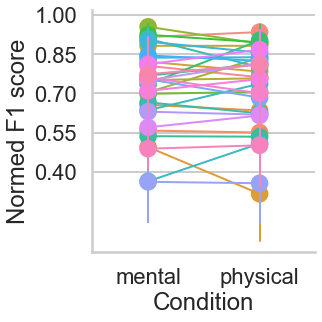

In [386]:
subject_means_by_condition = df.groupby(['gameID','condition']).mean()
condition_means = subject_means_by_condition.groupby('condition')['normedScore'].mean()

subject_scores_by_condition = subject_means_by_condition['normedScore']

fig = plt.figure(figsize=(8,6))
sns.set_context('poster')
sns.set_style('whitegrid', {'legend.frameon':False})
c = sns.catplot(x='condition', 
                y='normedScore', 
                hue='gameID', 
                kind='point', 
                legend=False,
                data=df);
plt.ylabel('Normed F1 score')
plt.xlabel('Condition')
plt.yticks(np.linspace(0.4,1,5))
plt.setp(c.ax.lines,linewidth=2)
plt.tight_layout()



In [336]:
score_condition = df[['condition','normedScore']]

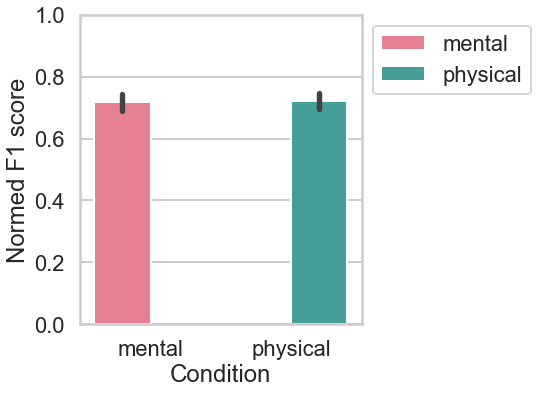

In [388]:
fig = plt.figure(figsize=(8,6))
sns.set_context('poster')
sns.set_style('whitegrid', {'legend.frameon':False})
b = sns.barplot(data=score_condition,
                palette='husl',
                hue='condition',
                x='condition',
                y='normedScore')
plt.legend(bbox_to_anchor=(1.0,1))
plt.ylabel('Normed F1 score')
plt.xlabel('Condition')
plt.yticks(np.linspace(0,1,6))
plt.tight_layout()


/Users/will/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  app.launch_new_instance()


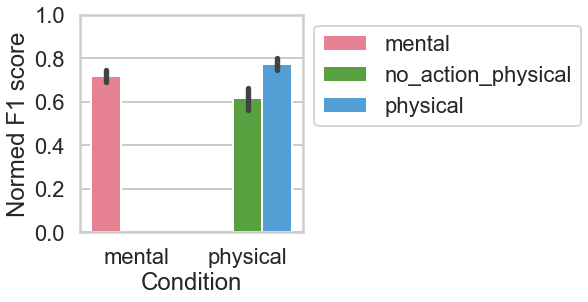

In [387]:
df['extendedCondition'] = df['condition']
df.loc[(df.condition == 'physical') & (df.numBlocksExplore == 0),'extendedCondition'] = 'no_action_physical'

fig = plt.figure(figsize=(4,4))
sns.set_context('poster')
sns.set_style('whitegrid', {'legend.frameon':False})
b = sns.barplot(data = df,
                palette='husl',
                hue='extendedCondition',
                x='condition',
                y='normedScore')
plt.legend(bbox_to_anchor=(1.0,1))
plt.ylabel('Normed F1 score')
plt.xlabel('Condition')
plt.yticks(np.linspace(0,1,6))
plt.tight_layout()




In [ ]:
# Add a condition for physical with 0 actions
df['extendedCondition'] = df['condition']
df.loc[(df.condition == 'physical') & (df.numBlocksExplore == 0),'extendedCondition'] = 'no_action_physical'


/Users/will/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  app.launch_new_instance()


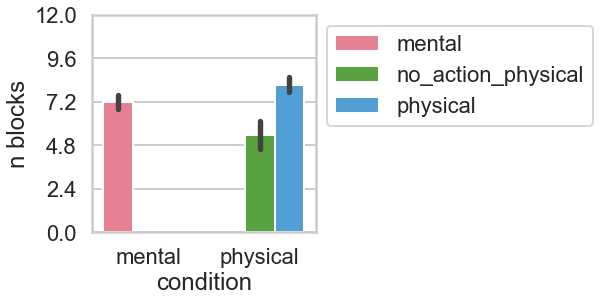

In [294]:
fig = plt.figure(figsize=(4,4))
sns.set_context('poster')
sns.set_style('whitegrid', {'legend.frameon':False})
b = sns.barplot(data=df,
                palette='husl',
                hue='extendedCondition',
                x='condition',
                y='numBlocks')
plt.legend(bbox_to_anchor=(1.0,1))
plt.ylabel('n blocks')
plt.xlabel('condition')
plt.yticks(np.linspace(0,12,6))
plt.tight_layout()

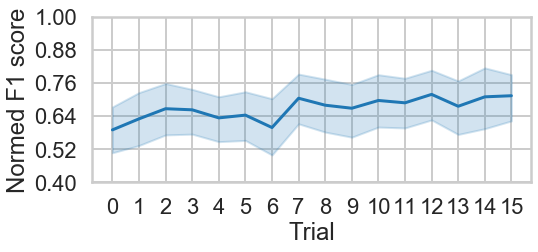

In [201]:
score_trials = df[['trialNum','normedScore']]

fig = plt.figure(figsize=(8,4))
sns.set_context('poster')
sns.set_style('whitegrid', {'legend.frameon':False})
b = sns.lineplot(data=score_trials,
                palette='husl',
                x='trialNum',
                y='normedScore')
plt.ylabel('Normed F1 score')
plt.xlabel('Trial')
plt.yticks(np.linspace(0.4,1,6))
plt.xticks(np.linspace(0,15,16))
plt.tight_layout()

## Load settled dataframe

In [399]:
## load in dataframe
iterationName = 'pilot4'

data_path = os.path.join(csv_dir,'block_silhouette_settled_{}.csv'.format(iterationName))
dfs = pd.read_csv(data_path)

### Exclude outliers

In [400]:
low_scores = df[(df.trialNum == 15) & (df.score == 0)]['gameID']
dfs = dfs[~dfs.gameID.isin(low_scores)]

In [401]:
# Add a condition for physical with 0 actions
dfs['extendedCondition'] = dfs['condition']

trialInfo = df[['gameID','trialNum','numBlocksExplore']]

dfs = dfs.merge(trialInfo, on=['gameID', 'trialNum'], how='left')

In [402]:
dfs.loc[(df.condition == 'physical') & (dfs.numBlocksExplore == 0),'extendedCondition'] = 'no_action_physical'

In [403]:
# Add useful variables to dataframe

dfs['subject_trial'] = dfs['gameID'] + '_' + str(dfs['trialNum'])
dfs['condition_number'] = np.where(dfs['condition']=='mental', 100, 2)
dfs['condition_code'] = dfs['condition_number'] + dfs['trialNum']
dfs['time_bin'] = np.round_(dfs['timePlaced']/10000)*10000

dfs_build = dfs[dfs.phase == 'build']
dfs_explore = dfs[dfs.phase == 'explore']


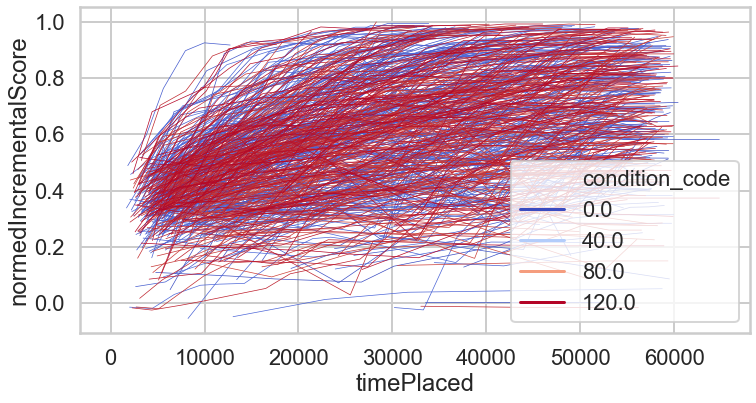

In [406]:
dfs['subject_trial'] = dfs['gameID'] + '_' + str(dfs['trialNum'])
dfs['condition_number'] = np.where(dfs['condition']=='mental', 100, 2)
dfs['condition_code'] = dfs['condition_number'] + dfs['trialNum']/2

fig = plt.figure(figsize=(12,6))
sns.set_context('poster')
sns.set_style('whitegrid', {'legend.frameon':False})
ax = sns.lineplot(x="timePlaced", 
                  y="normedIncrementalScore", 
                  hue='condition_code', 
                  units="subject_trial",
                  palette='coolwarm',
                  estimator=None, lw=0.7,
                  data=dfs[dfs['phase']=='build'])

#red is mental, blue is physical

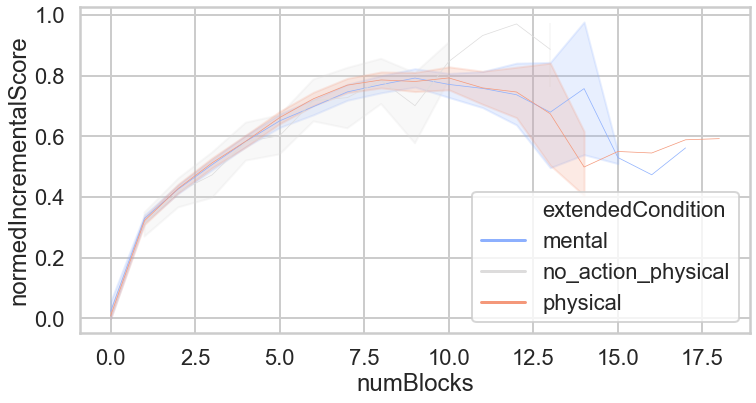

In [376]:
# 'Scores over time across participant and structure, by condition'

fig = plt.figure(figsize=(12,6))
sns.set_context('poster')
sns.set_style('whitegrid', {'legend.frameon':False})
ax = sns.lineplot(x="numBlocks", 
                  y="normedIncrementalScore", 
                  hue='extendedCondition', 
                  estimator= np.mean,
                  palette='coolwarm',
                  lw=0.7,
                  data=dfs[dfs.phase == 'build']) #and numblocks=0

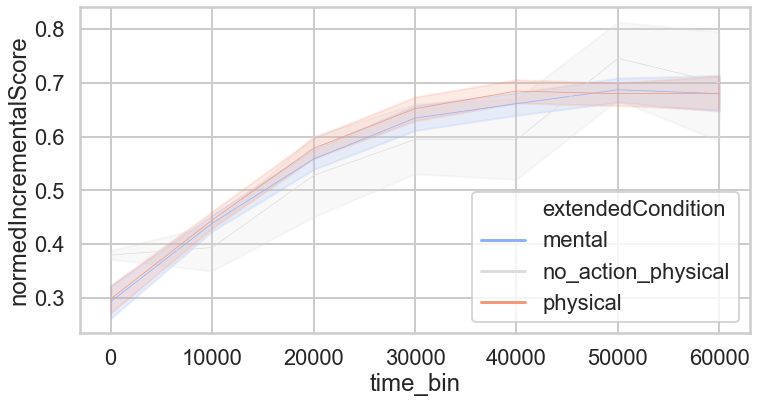

In [375]:
fig = plt.figure(figsize=(12,6))
sns.set_context('poster')
sns.set_style('whitegrid', {'legend.frameon':False})
ax = sns.lineplot(x="time_bin", 
                  y="normedIncrementalScore", 
                  hue='extendedCondition', 
                  estimator= np.mean,
                  palette='coolwarm',
                  lw=0.7,
                  data=dfs[dfs.phase == 'build'])

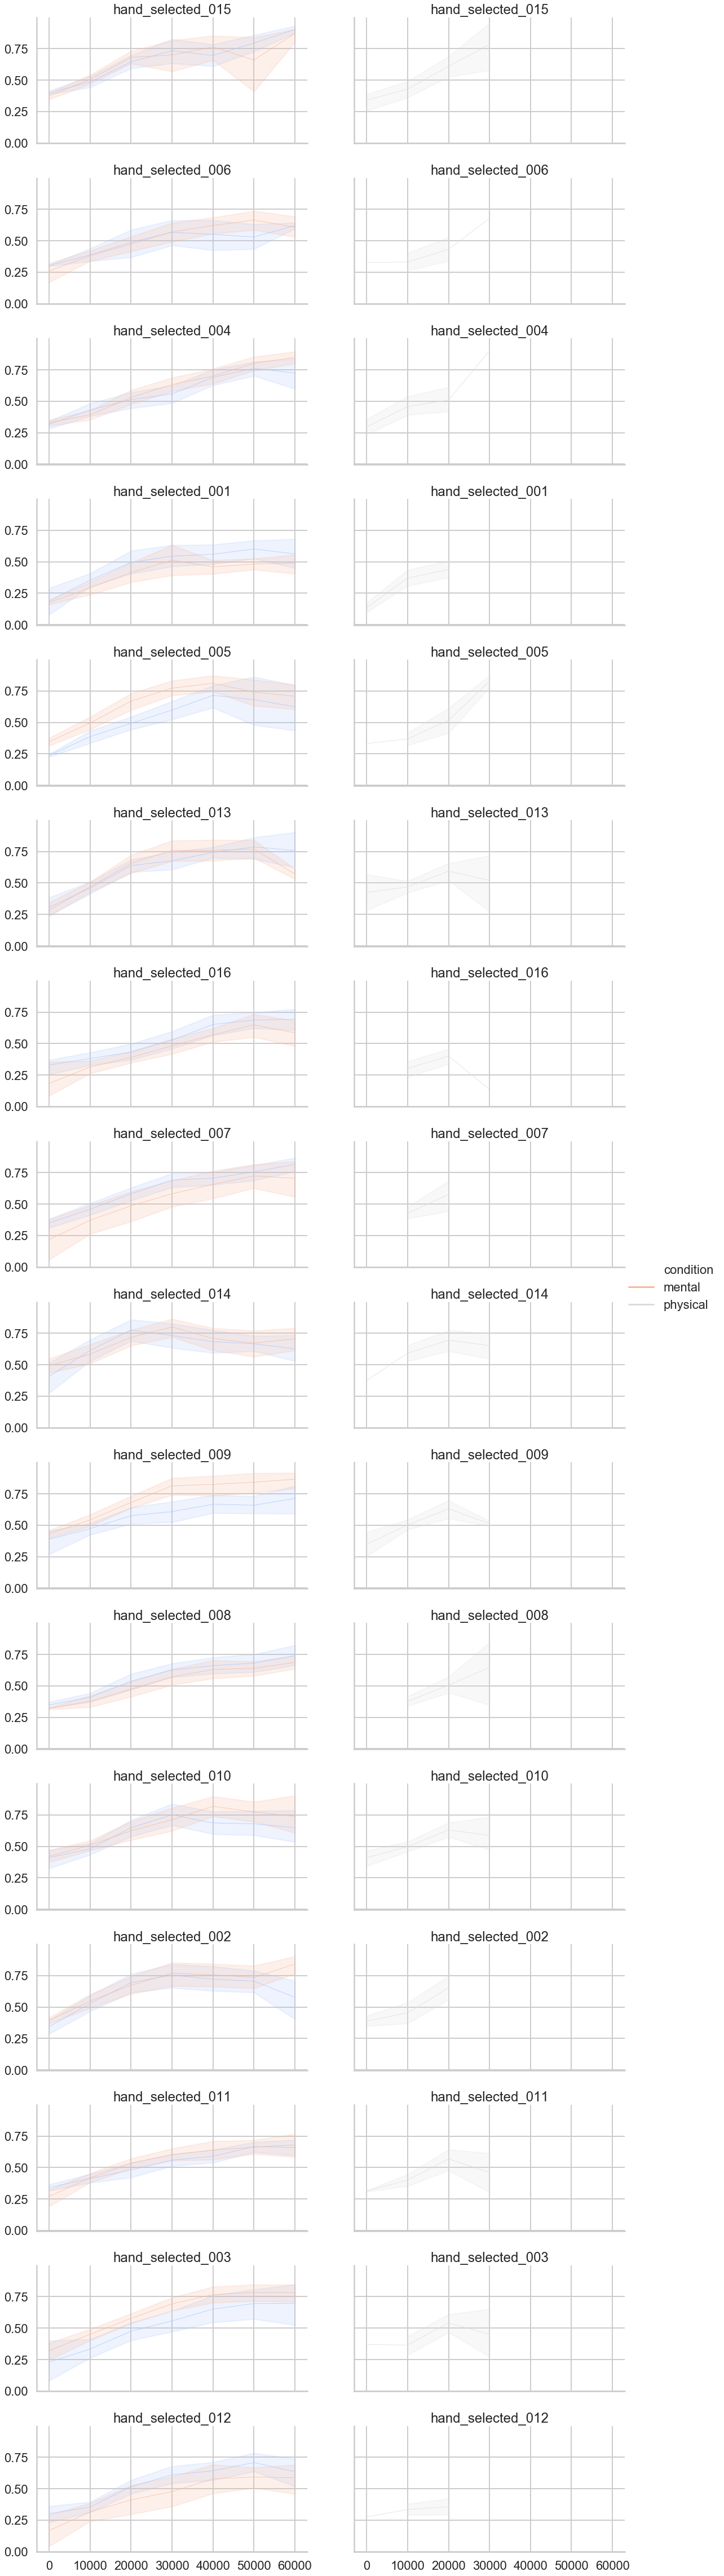

In [377]:
# 'Mean scores for each structure over time (binned), by condition and phase'

g = sns.FacetGrid(data=dfs, row="targetName", col="phase", height=4, aspect = 2)

sns.set_context('poster')
sns.set_style('whitegrid', {'legend.frameon':False})

g = g.map_dataframe(sns.lineplot, x="time_bin", 
                  y="normedIncrementalScore", 
                  hue='condition', 
                  estimator= np.mean,
                  palette='coolwarm',
                  lw=0.7).set_titles("{row_name}").add_legend()


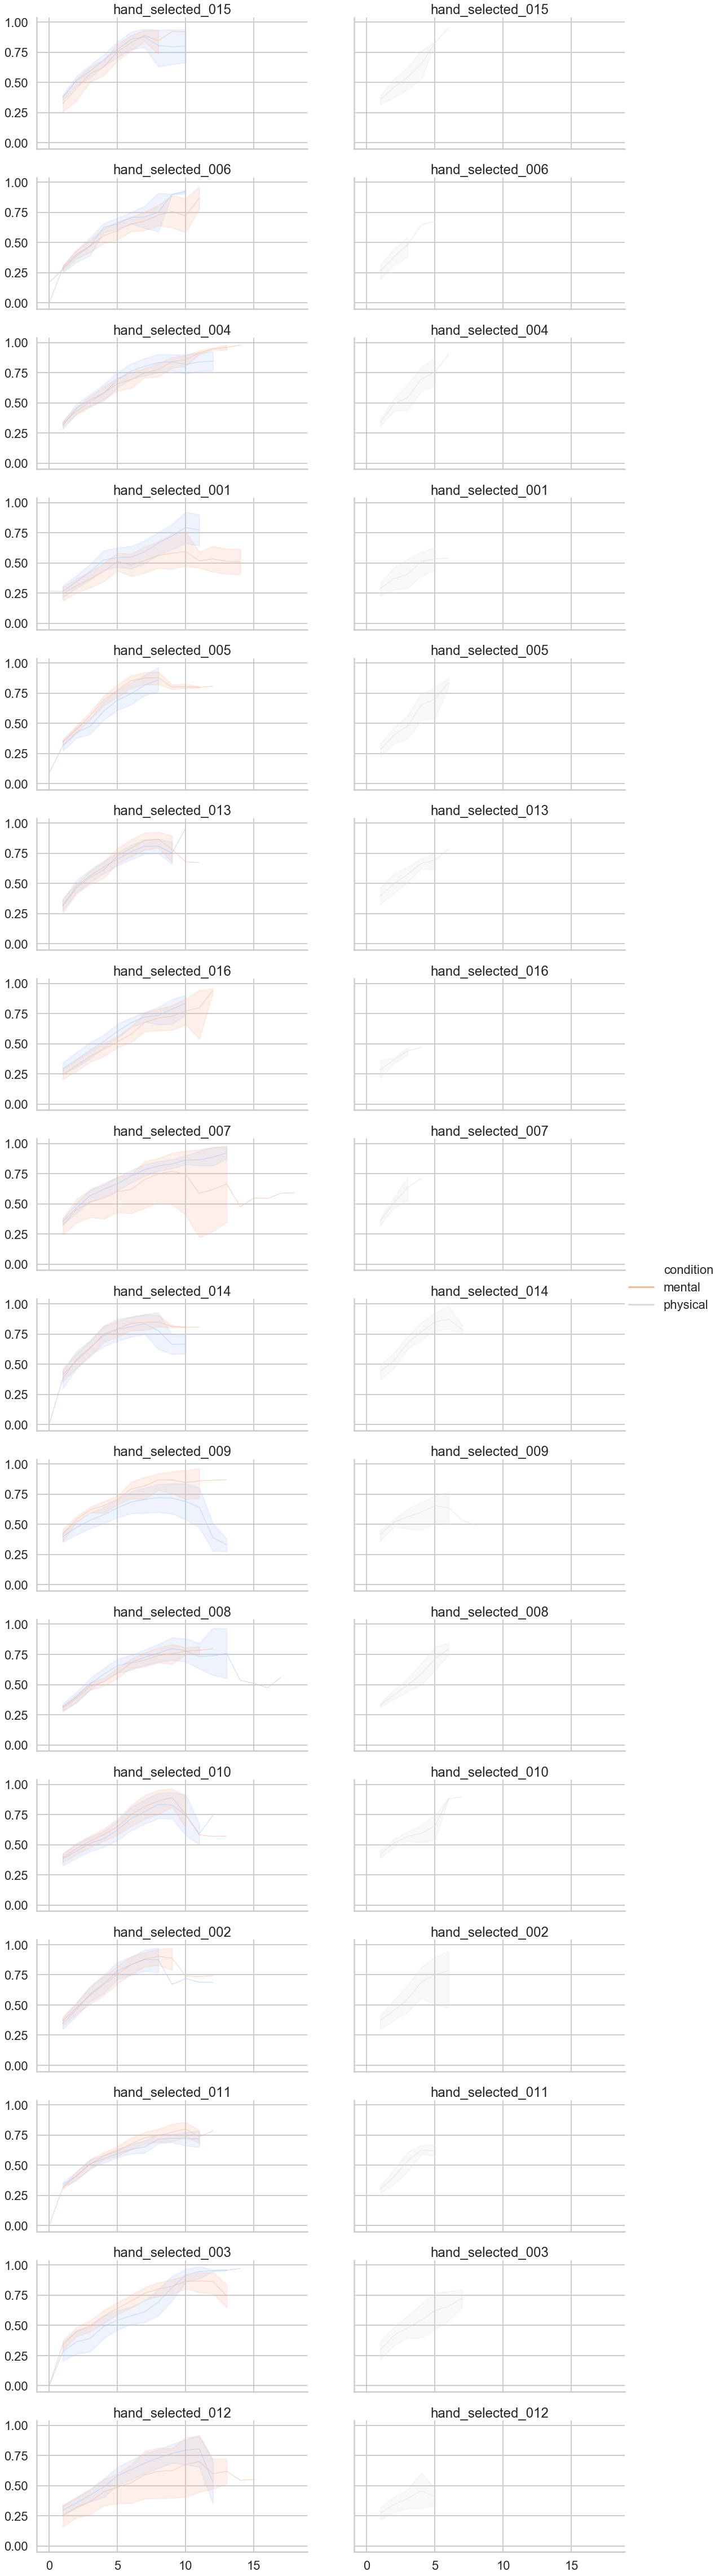

In [378]:
g = sns.FacetGrid(data=dfs, row="targetName", col="phase", height=4, aspect = 2)
sns.set_context('poster')
sns.set_style('whitegrid')
g = g.map_dataframe(sns.lineplot,
                    x="numBlocks", 
                    y="normedIncrementalScore", 
                    hue='condition', 
                    palette='coolwarm',
                    lw=0.7).set_titles("{row_name}").add_legend()


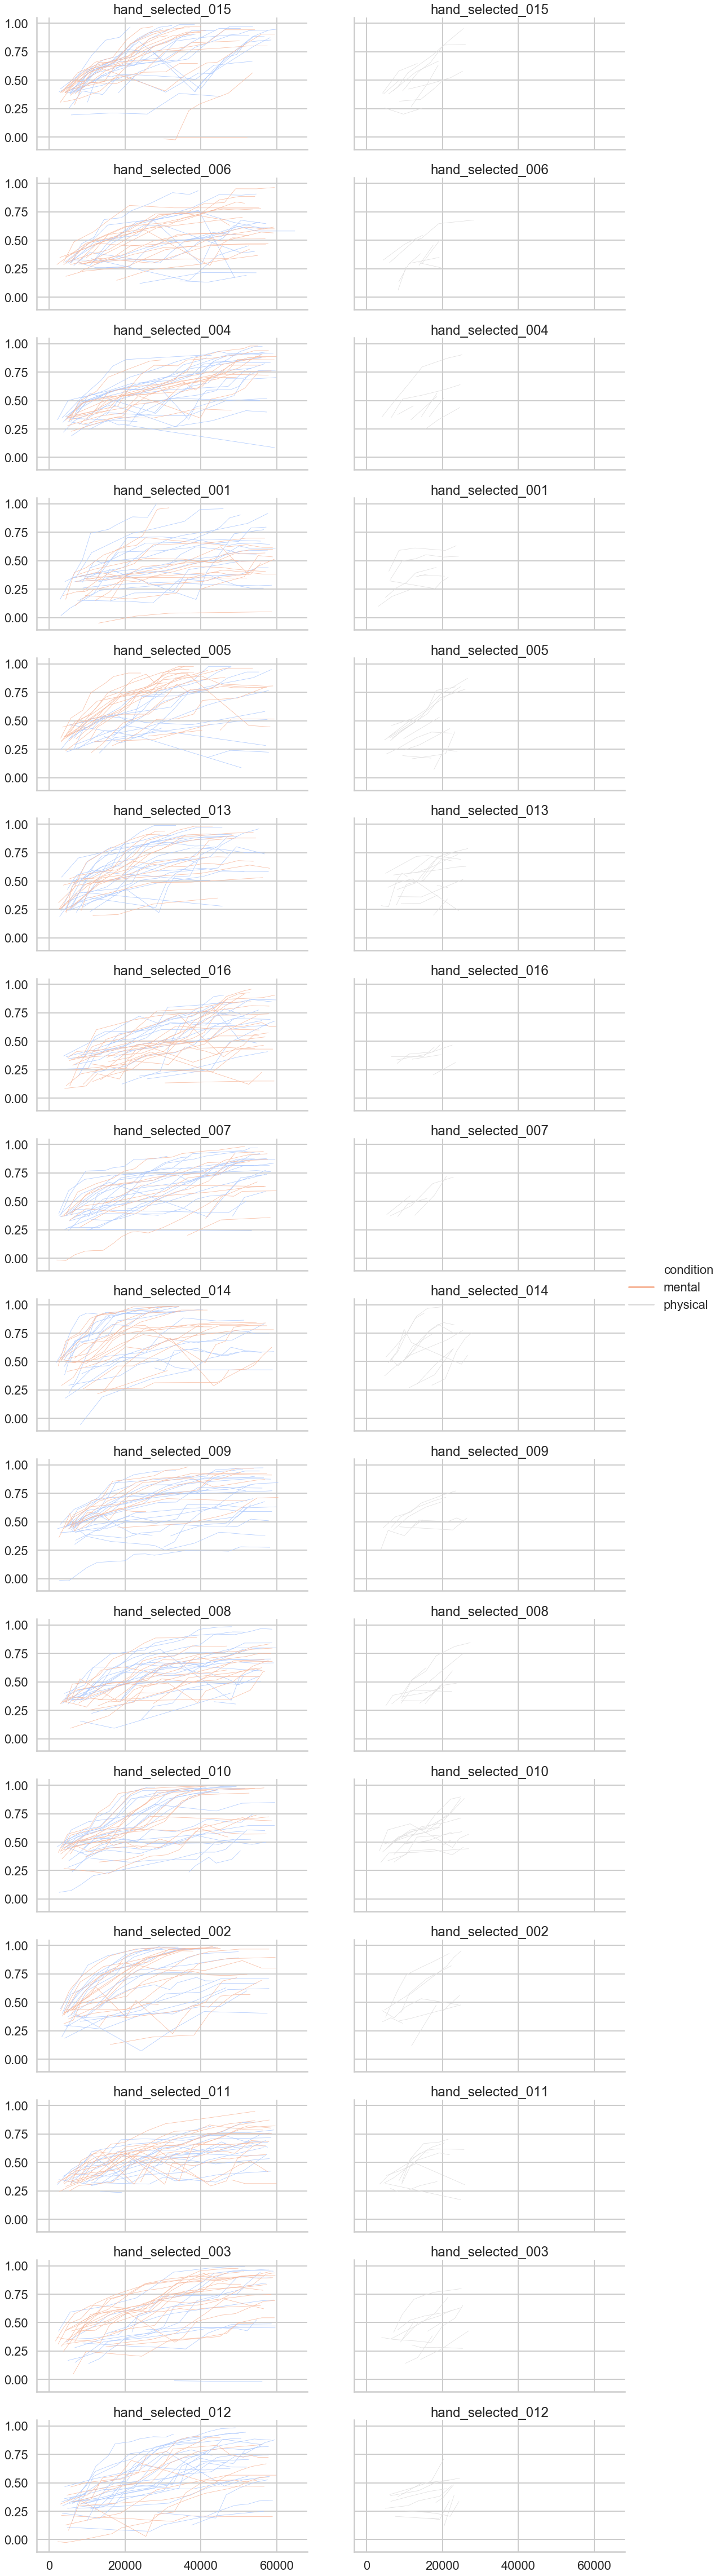

In [379]:
# 'Individual scores for each attempt at each structure over time, by condition and phase'

g = sns.FacetGrid(data=dfs, row="targetName", col="phase", height=4, aspect = 2, legend_out = True)

sns.set_context('poster')
sns.set_style('whitegrid')
g = g.map_dataframe(sns.lineplot,
                        x="timePlaced", 
                        y="normedIncrementalScore", 
                        hue='condition', 
                        label='condition',
                        units="subject_trial",
                        estimator=None,
                        palette='coolwarm',
                        lw=0.7).set_titles("{row_name}").add_legend()


In [ ]:
# 'Mean scores for each participant over time, by condition and phase'

g = sns.FacetGrid(data=dfs, row="gameID", col="phase", height=4, aspect = 2, legend_out = True)

sns.set_context('poster')
sns.set_style('whitegrid')
g = g.map_dataframe(sns.lineplot,
                        x="time_bin", 
                        y="normedIncrementalScore", 
                        hue='condition', 
                        estimator=np.mean,
                        palette='coolwarm',
                        lw=0.7).set_titles('subject').add_legend()


{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4}


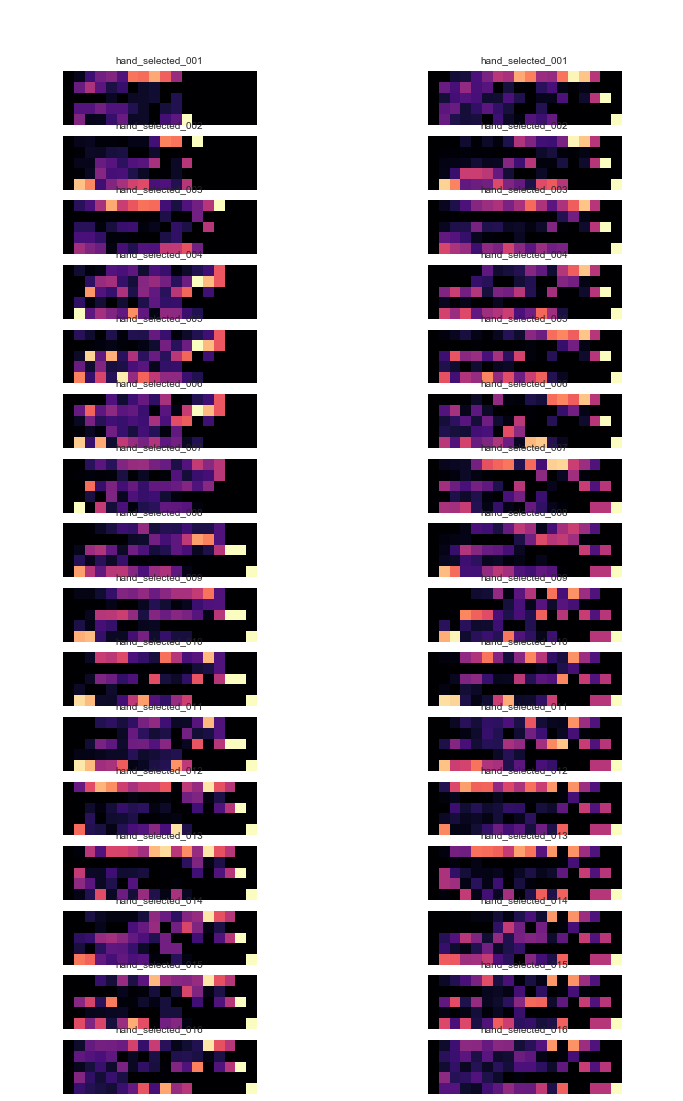

In [668]:
max_n_blocks = max(dfs['numBlocks'])
n_block_kinds = dfs['blockKind'].nunique()
blockKinds = np.sort(dfs['blockKind'].unique())
targets = np.sort(dfs['targetName'].unique())

b_map = dict(zip(blockKinds, range(0,n_block_kinds)))
print(b_map)
blockKind_blockNum = np.zeros([n_block_kinds,max_n_blocks])
fig, axs = plt.subplots(len(targets)+1,2, figsize=(12,20))

for ci, condition in enumerate(['mental','physical']):
    p = 0
    for target in targets:
        p += 1
        target_settled = dfs[(dfs.targetName == target) & (dfs.condition == condition)]

        for i in range(1, max_n_blocks):
            ith_blocks = target_settled[target_settled.numBlocks == i]['blockKind']
            for b in ith_blocks:
                blockKind_blockNum[b_map[b],i] += 1

        #normalize
        blockKind_blockNum = blockKind_blockNum/list(map((lambda x: max([1,x])),np.sum(blockKind_blockNum, axis=0)))

        axs[p,ci].matshow(blockKind_blockNum)
        
        axs[p,ci].set_title(target, fontsize=10)

for ax in axs.flat:
    ax.axis('off')

plt.get_cmap().set_bad(color='red')
plt.set_cmap('magma')

In [ ]:
# difference?
# more similar at start, at end?

In [664]:
list()

[1,
 19.0,
 19.0,
 18.0,
 16.0,
 16.0,
 14.0,
 13.0,
 11.0,
 9.0,
 7.0,
 2.0,
 1,
 1,
 1,
 1,
 1,
 1]

In [622]:
#code that turned out not to be useful but keeping for reference if I want to do similar analyses

dfsmat = dfs[['gameID','blockKind','numBlocks','targetName','condition']]
dfsmatCounts = dfsmat.groupby(['condition','targetName','numBlocks','blockKind']).count()['gameID']
dfsmatTotals = dfsmat.groupby(['condition','targetName','numBlocks']).count()['blockKind']
dfsmatNormed = dfsmatCounts/dfsmatTotals
dfsmatNormed = dfsmatNormed.reset_index()

g = sns.FacetGrid(data=dfsmatNormed.unstack(level=0), 
                           row="targetName", col="condition", height=4, aspect = 2, legend_out = True)

sns.set_context('poster')
sns.set_style('whitegrid')
g = g.map_dataframe(sns.heatmap, 
                        vmin = 0,
                        vmax = 1,
                        palette='coolwarm').set_titles("{targetName}")


ValueError: operands could not be broadcast together with shapes (1220,) (6100,) 

In [578]:
dfsmat = dfs[['gameID','blockKind','numBlocks','targetName','condition']]
dfsmatCounts = dfsmat.groupby(['condition','targetName','numBlocks','blockKind']).count()['gameID']
dfsmatTotals = dfsmat.groupby(['condition','targetName','numBlocks']).count()['blockKind']
dfsmatNormed = dfsmatCounts/dfsmatTotals

0       0.666667
1       0.333333
2       0.052632
3       0.315789
4       0.263158
5       0.368421
6       0.210526
7       0.473684
8       0.263158
9       0.052632
10      0.333333
11      0.277778
12      0.333333
13      0.055556
14      0.375000
15      0.125000
16      0.062500
17      0.250000
18      0.187500
19      0.250000
20      0.187500
21      0.250000
22      0.312500
23      0.714286
24      0.071429
25      0.142857
26      0.071429
27      0.692308
28      0.076923
29      0.076923
          ...   
1190    0.058824
1191    0.400000
1192    0.133333
1193    0.133333
1194    0.266667
1195    0.066667
1196    0.285714
1197    0.285714
1198    0.071429
1199    0.142857
1200    0.214286
1201    0.416667
1202    0.083333
1203    0.166667
1204    0.083333
1205    0.250000
1206    0.400000
1207    0.100000
1208    0.100000
1209    0.400000
1210    0.111111
1211    0.333333
1212    0.222222
1213    0.333333
1214    0.166667
1215    0.333333
1216    0.166667
1217    0.3333